In [248]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [249]:
coasters = pd.read_excel("data/Roller Coaster Data.xlsx", sheet_name=0)
locations = pd.read_excel("data/Roller Coaster Data.xlsx", sheet_name=1)

In [250]:
coasters.head()

,Coaster_Name,Coaster_Park,Drop_Height,Top_Speed,Avg_Speed,Duration,Capacity,Type,Year_Const,Material,Inversion_Num,Breakdowns,Wait_Time,Height_Req,Orientation,Drive_Mech
0,Geist Schmelzen,Beschleunigungszone,199,144.362,91.536,171.58,40,Outdoors,2010,Steel,17,8,58.376,42.0,Sitting,Electromagnetic
1,Overdrive,Horsepower Bay,126,75.492,54.376,99.73,36,Indoors,2004,Steel,8,23,22.415,NaN,Standing,Hydraulic
2,Fifth Gear,Horsepower Bay,124,64.446,42.867,141.24,20,Outdoors,2002,Steel,11,24,29.393,42.0,Sitting,Hydraulic
3,Barco No Rio Amazonas,Cidade Da Velocidade,197,129.226,80.908,152.51,24,Outdoors,2010,Steel,10,11,78.880,NaN,Standing,Electromagnetic
4,The Mind Melter,Treasure Island,349,61.581,66.966,142.51,28,Outdoors,1996,Steel,11,47,43.917,36.0,Sitting,Mechanical


In [251]:
locations.head()

,Coaster_Park,Park_Country,Park_Region,Park_City,Admission_Price,Admission_Num,Avg_Temp,Avg_Rainfall,Rain_Days,Age_1_25,...,Age_3_25,Age_4_25,Age_1_50,Age_2_50,Age_3_50,Age_4_50,Male_25,Female_25,Male_50,Female_50
0,Funville,United States,Texas,Arlington,45.000,923943,77.54,38.36,48.55,130810,...,75315,23784,144446,194254,104599,54790,195638,200756,242875,255214
1,Swamp Valley Thrill Zone,United States,Louisiana,Baton Rouge,30.000,525327,75.13,49.58,178.11,56345,...,28172,30426,187627,167343,91278,60852,115448,109930,265562,241538
2,Beschleunigungszone,Germany,Hesse,Frankfurt,23.168,1707802,52.69,24.77,72.61,139211,...,230797,117230,170873,290484,256310,136699,378166,354522,427061,427305
3,Sharkie Shoals,United States,Florida,Clearwater,40.000,1291517,72.64,52.60,187.97,24741,...,21497,30309,159981,249624,119411,111305,59703,55809,325581,314740
4,Horsepower Bay,United States,Michigan,Ann Arbor,30.000,795173,49.78,37.55,160.19,26342,...,50253,17326,284985,276150,189599,116426,60343,61134,450650,416510


Text(0, 0.5, 'Revenue (Hundreds of Millions)')

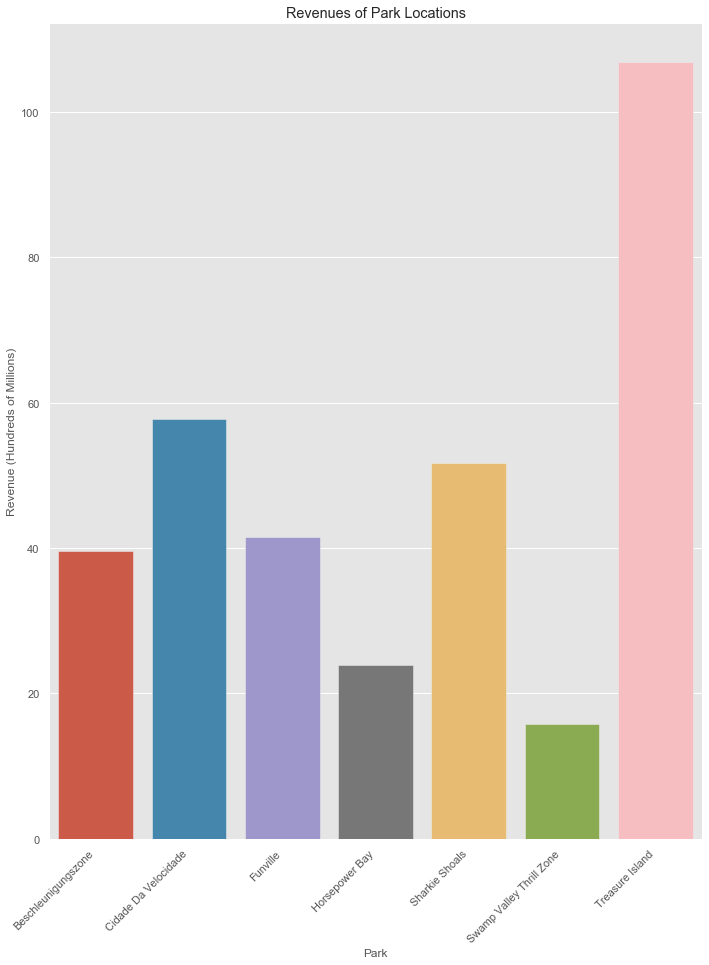

In [254]:
# explore location data 
locations = locations.set_index("Coaster_Park").sort_index()
locations_revenue = locations["Admission_Num"] * locations["Admission_Price"] / 1000000
rev_plot = sns.barplot(x=locations_revenue.index, y=locations_revenue)
rev_plot.set_xticklabels(rev_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
rev_plot.set_title("Revenues of Park Locations")
rev_plot.set_xlabel("Park")
rev_plot.set_ylabel("Revenue (Hundreds of Millions)")

In [256]:
# want to determine revenue generated by each coaster
coasters["num_coasters"] = coasters.groupby("Coaster_Park")["Coaster_Park"].transform("count")
coasters.head() 

,Coaster_Name,Coaster_Park,Drop_Height,Top_Speed,Avg_Speed,Duration,Capacity,Type,Year_Const,Material,Inversion_Num,Breakdowns,Wait_Time,Height_Req,Orientation,Drive_Mech,num_coasters
0,Geist Schmelzen,Beschleunigungszone,199,144.362,91.536,171.58,40,Outdoors,2010,Steel,17,8,58.376,42.0,Sitting,Electromagnetic,9
1,Overdrive,Horsepower Bay,126,75.492,54.376,99.73,36,Indoors,2004,Steel,8,23,22.415,NaN,Standing,Hydraulic,3
2,Fifth Gear,Horsepower Bay,124,64.446,42.867,141.24,20,Outdoors,2002,Steel,11,24,29.393,42.0,Sitting,Hydraulic,3
3,Barco No Rio Amazonas,Cidade Da Velocidade,197,129.226,80.908,152.51,24,Outdoors,2010,Steel,10,11,78.880,NaN,Standing,Electromagnetic,6
4,The Mind Melter,Treasure Island,349,61.581,66.966,142.51,28,Outdoors,1996,Steel,11,47,43.917,36.0,Sitting,Mechanical,10


In [257]:
# join two datasets
all_data = pd.merge(coasters, locations, on="Coaster_Park").sort_values(by="Coaster_Park")
all_data["hourly_capacity"] = all_data["Capacity"] / all_data["Duration"] * 3600
all_data["park_capacity"] = all_data.groupby("Coaster_Park")["hourly_capacity"].transform("sum")
all_data["success_metric"] = ( (all_data["hourly_capacity"] / all_data["park_capacity"]) *
                             (all_data["Admission_Num"]*all_data["Admission_Price"] / all_data["num_coasters"]) *
                             (1 / all_data["Breakdowns"]) ) 
all_data.head()

,Coaster_Name,Coaster_Park,Drop_Height,Top_Speed,Avg_Speed,Duration,Capacity,Type,Year_Const,Material,...,Age_2_50,Age_3_50,Age_4_50,Male_25,Female_25,Male_50,Female_50,hourly_capacity,park_capacity,success_metric
0,Geist Schmelzen,Beschleunigungszone,199,144.362,91.536,171.58,40,Outdoors,2010,Steel,...,290484,256310,136699,378166,354522,427061,427305,839.258655,6981.415655,66061.114909
1,Slalom Fahren,Beschleunigungszone,175,93.807,63.231,120.86,20,Outdoors,2008,Steel,...,290484,256310,136699,378166,354522,427061,427305,595.730597,6981.415655,37513.705432
2,Berg Jodler,Beschleunigungszone,172,136.491,96.424,134.74,36,Outdoors,2005,Steel,...,290484,256310,136699,378166,354522,427061,427305,961.852457,6981.415655,35628.668674
3,Splittergeschwindigkeit,Beschleunigungszone,192,90.593,50.071,109.98,20,Outdoors,2009,Steel,...,290484,256310,136699,378166,354522,427061,427305,654.664484,6981.415655,41224.826682
4,Fallschirmspringen,Beschleunigungszone,175,102.056,75.726,86.75,24,Outdoors,1996,Steel,...,290484,256310,136699,378166,354522,427061,427305,995.965418,6981.415655,14585.316604


[Text(0, 0, 'Beschleunigungszone'),
 Text(0, 0, 'Cidade Da Velocidade'),
 Text(0, 0, 'Funville'),
 Text(0, 0, 'Horsepower Bay'),
 Text(0, 0, 'Sharkie Shoals'),
 Text(0, 0, 'Swamp Valley Thrill Zone'),
 Text(0, 0, 'Treasure Island')]

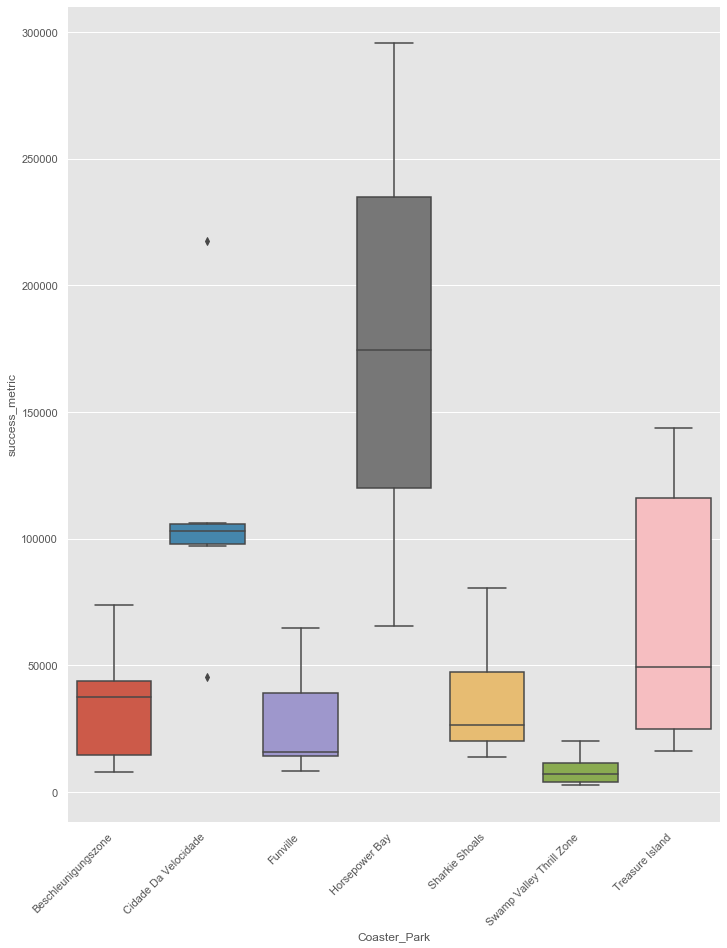

In [258]:
# success distribution for different parks
success_dist = sns.boxplot(x="Coaster_Park", y="success_metric", data=all_data)
success_dist.set_xticklabels(success_dist.get_xticklabels(), rotation=45, horizontalalignment='right')

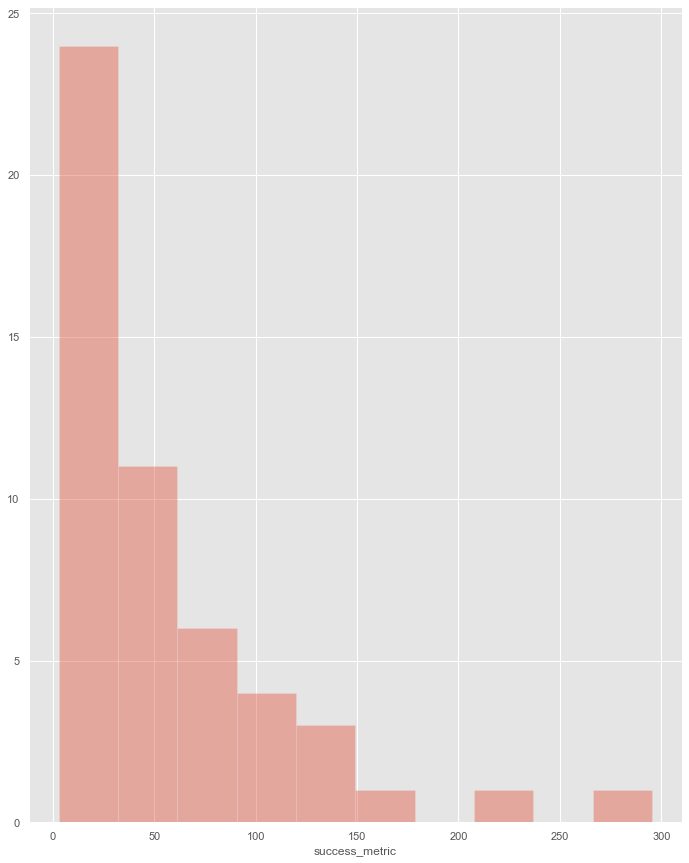

In [259]:
# distribution of success metric
sns.distplot(all_data["success_metric"] / 1000, kde=False)

In [260]:
all_data.columns

Index(['Coaster_Name', 'Coaster_Park', 'Drop_Height', 'Top_Speed', 'Avg_Speed',
       'Duration', 'Capacity', 'Type', 'Year_Const', 'Material',
       'Inversion_Num', 'Breakdowns', 'Wait_Time', 'Height_Req', 'Orientation',
       'Drive_Mech', 'num_coasters', 'Park_Country', 'Park_Region',
       'Park_City', 'Admission_Price', 'Admission_Num', 'Avg_Temp',
       'Avg_Rainfall', 'Rain_Days', 'Age_1_25', 'Age_2_25', 'Age_3_25',
       'Age_4_25', 'Age_1_50', 'Age_2_50', 'Age_3_50', 'Age_4_50', 'Male_25',
       'Female_25', 'Male_50', 'Female_50', 'hourly_capacity', 'park_capacity',
       'success_metric'],
      dtype='object')

In [261]:
#### Data Preparation ####
cleaned_data = all_data.copy()

# drop columns used to create response, this is capctured in our success metric
drop_cols = ["Coaster_Park", "Duration", "Capacity", "Breakdowns", "num_coasters", 
             "Admission_Price", "Admission_Num", "hourly_capacity", "park_capacity", "Park_City"]
cleaned_data = cleaned_data.set_index("Coaster_Name").drop(drop_cols, axis=1)

# year should be category, not numerical
cleaned_data["Year_Const"] = cleaned_data["Year_Const"].astype("category")

cleaned_data_dummies = pd.get_dummies(cleaned_data)


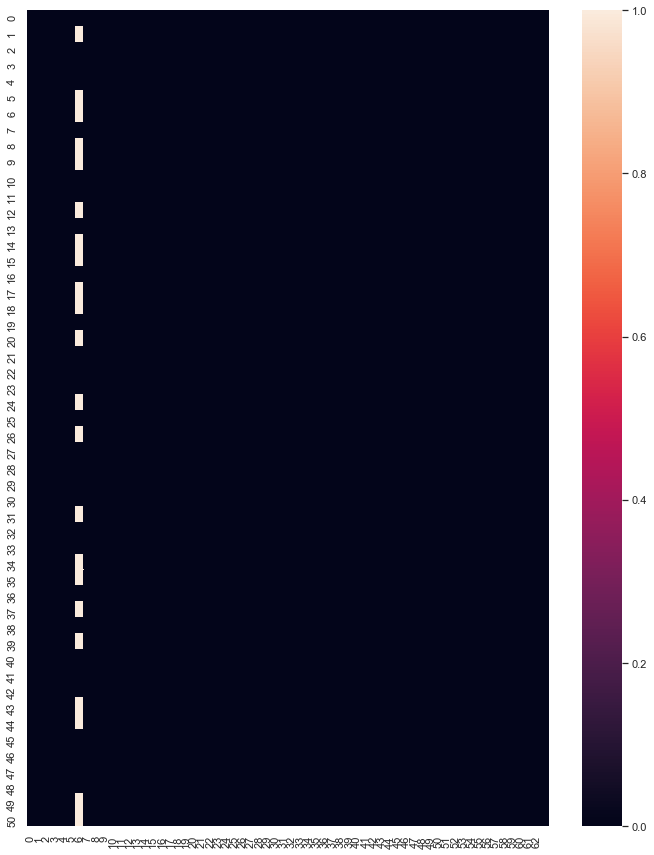

In [200]:
# check for NA
sns.heatmap(cleaned_data_dummies.reset_index().isna(), xticklabels=range(0, cleaned_data_dummies.shape[1]))

In [262]:
cleaned_data_dummies.fillna(0, inplace=True)

In [263]:
# scale all data between 0 and 1
normalized_df = (cleaned_data_dummies-cleaned_data_dummies.min())/(cleaned_data_dummies.max()-cleaned_data_dummies.min())

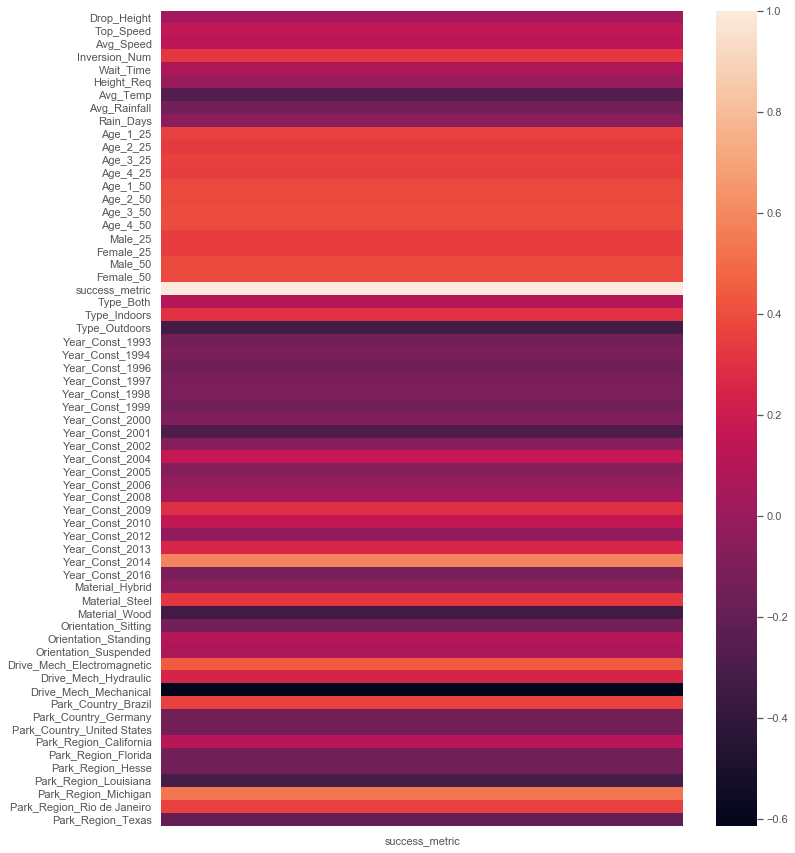

In [264]:
# correlation heatmap 
corr = normalized_df.corr()
sns.heatmap(pd.DataFrame(corr["success_metric"]), yticklabels=True)
sns.set(rc={'figure.figsize':(11.7,15)})

In [265]:
# export dataset to create model in R
normalized_df.to_csv("data/normalized_coaster_data.csv")

In [266]:
# jax data creation 

# See http://www.statsamerica.org/radius/big.aspx for radius estimates
total_pop_25 = 1265632
total_pop_50 = 1745531

# https://data.census.gov/cedsci/table?q=jacksonville&tid=ACSST1Y2019.S0101&moe=false&tp=true&hidePreview=true
demographic_data = pd.read_csv("data/ACSST1Y2019.S0101-2020-10-25T171311.csv", index_col="Label")
demographic_data.index = pd.Series(demographic_data.index).apply(str.strip)

# https://www.weather-us.com/en/florida-usa/jacksonville-climate#rainfall_days
avg_temp = 79.9
avg_rain_days = 113.5
avg_rain = 52.5

In [267]:
demographic_data.columns

Index(['Jacksonville city, Florida!!Total!!Estimate',
       'Jacksonville city, Florida!!Total!!Margin of Error',
       'Jacksonville city, Florida!!Percent!!Estimate',
       'Jacksonville city, Florida!!Percent!!Margin of Error',
       'Jacksonville city, Florida!!Male!!Estimate',
       'Jacksonville city, Florida!!Male!!Margin of Error',
       'Jacksonville city, Florida!!Percent Male!!Estimate',
       'Jacksonville city, Florida!!Percent Male!!Margin of Error',
       'Jacksonville city, Florida!!Female!!Estimate',
       'Jacksonville city, Florida!!Female!!Margin of Error',
       'Jacksonville city, Florida!!Percent Female!!Estimate',
       'Jacksonville city, Florida!!Percent Female!!Margin of Error'],
      dtype='object')

In [268]:
demographic_data.index

Index(['Total population', 'AGE', 'Under 5 years', '5 to 9 years',
       '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years',
       '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years',
       '50 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 69 years',
       '70 to 74 years', '75 to 79 years', '80 to 84 years',
       '85 years and over', 'SELECTED AGE CATEGORIES', '5 to 14 years',
       '15 to 17 years', 'Under 18 years', '18 to 24 years', '15 to 44 years',
       '16 years and over', '18 years and over', '21 years and over',
       '60 years and over', '62 years and over', '65 years and over',
       '75 years and over', 'SUMMARY INDICATORS', 'Median age (years)',
       'Sex ratio (males per 100 females)', 'Age dependency ratio',
       'Old-age dependency ratio', 'Child dependency ratio',
       'PERCENT ALLOCATED', 'Sex', 'Age'],
      dtype='object', name='Label')

In [269]:
# construct jax data from census
jax = dict()
jax["Age_1"] = sum(demographic_data.loc[
                    "Under 5 years":"20 to 24 years", 
                    'Jacksonville city, Florida!!Percent!!Estimate'
                ].str.strip('%').astype(float))
jax["Age_2"] = sum(demographic_data.loc[
                    "25 to 29 years":"45 to 49 years", 
                    'Jacksonville city, Florida!!Percent!!Estimate'
                ].str.strip('%').astype(float))
jax["Age_3"] = sum(demographic_data.loc[
                    "50 to 54 years":"70 to 74 years", 
                    'Jacksonville city, Florida!!Percent!!Estimate'
                ].str.strip('%').astype(float))
jax["Age_4"] = sum(demographic_data.loc[
                    "75 to 79 years":"85 years and over", 
                    'Jacksonville city, Florida!!Percent!!Estimate'
                ].str.strip('%').astype(float))
sex_ratio = demographic_data.loc['Sex ratio (males per 100 females)','Jacksonville city, Florida!!Total!!Estimate']
pct_male = float(sex_ratio) / (100+float(sex_ratio))
pct_female = 100 / (100+float(sex_ratio))

In [270]:
# existing coasters with Jax location data
jax_coasters = all_data.copy()
drop_cols = ["Coaster_Park", "Duration", "Capacity", "Breakdowns", "num_coasters", 
             "Admission_Price", "Admission_Num", "hourly_capacity", "park_capacity", "Park_City"]
jax_coasters = jax_coasters.set_index("Coaster_Name").drop(drop_cols, axis=1)
jax_coasters["Year_Const"] = jax_coasters["Year_Const"].astype("category")
jax_coasters.head()

,Drop_Height,Top_Speed,Avg_Speed,Type,Year_Const,Material,Inversion_Num,Wait_Time,Height_Req,Orientation,...,Age_4_25,Age_1_50,Age_2_50,Age_3_50,Age_4_50,Male_25,Female_25,Male_50,Female_50,success_metric
Coaster_Name,,,,,,,,,,,,,,,,,,,,,
Geist Schmelzen,199,144.362,91.536,Outdoors,2010,Steel,17,58.376,42.0,Sitting,...,117230,170873,290484,256310,136699,378166,354522,427061,427305,66061.114909
Slalom Fahren,175,93.807,63.231,Outdoors,2008,Steel,3,43.210,NaN,Standing,...,117230,170873,290484,256310,136699,378166,354522,427061,427305,37513.705432
Berg Jodler,172,136.491,96.424,Outdoors,2005,Steel,10,56.840,48.0,Standing,...,117230,170873,290484,256310,136699,378166,354522,427061,427305,35628.668674
Splittergeschwindigkeit,192,90.593,50.071,Outdoors,2009,Steel,12,37.328,36.0,Sitting,...,117230,170873,290484,256310,136699,378166,354522,427061,427305,41224.826682
Fallschirmspringen,175,102.056,75.726,Outdoors,1996,Steel,7,31.787,42.0,Standing,...,117230,170873,290484,256310,136699,378166,354522,427061,427305,14585.316604


In [271]:
# set the jacksonville columns
jax_coasters["Park_Country"] = "United States"
jax_coasters["Park_Region"] = "Florida"
jax_coasters["Age_1_25"] = total_pop_25 * jax["Age_1"] / 100
jax_coasters["Age_2_25"] = total_pop_25 * jax["Age_2"] / 100
jax_coasters["Age_3_25"] = total_pop_25 * jax["Age_3"] / 100
jax_coasters["Age_4_25"] = total_pop_25 * jax["Age_4"] / 100
jax_coasters["Age_1_50"] = total_pop_50 * jax["Age_1"] / 100
jax_coasters["Age_2_50"] = total_pop_50 * jax["Age_2"] / 100
jax_coasters["Age_3_50"] = total_pop_50 * jax["Age_3"] / 100
jax_coasters["Age_4_50"] = total_pop_50 * jax["Age_4"] / 100
jax_coasters["Male_25"] = total_pop_25 * pct_male
jax_coasters["Female_25"] = total_pop_25 * pct_female
jax_coasters["Male_50"] = total_pop_50 * pct_male
jax_coasters["Female_50"] = total_pop_50 * pct_female
jax_coasters["Avg_Temp"] = avg_temp
jax_coasters["Avg_Rainfall"] = avg_rain
jax_coasters["Rain_Days"] = avg_rain_days

In [272]:
# need to get all the dummy variables 
jax_coasters.index = pd.Series(jax_coasters.index).apply(lambda x : f"Jax {x}")
jax_coasters = jax_coasters.append(cleaned_data)
jax_coasters_dummies = pd.get_dummies(jax_coasters)
jax_coasters_dummies.fillna(0, inplace=True)
jax_coasters_normalized = (jax_coasters_dummies-cleaned_data_dummies.min()) / (cleaned_data_dummies.max()-cleaned_data_dummies.min())

In [273]:
# export
jax_final = jax_coasters_normalized.iloc[:51].drop("success_metric", axis=1)
jax_final.to_csv("datajax_data.csv")